In [1]:
import matplotlib
#%matplotlib tk
%matplotlib inline
%autosave 180
%load_ext autoreload
%autoreload 2

import nest_asyncio

%config Completer.use_jedi = False

#
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 
import matplotlib.cm as cm
import numpy as np
import os
from tqdm import tqdm

#
import sys
sys.path.append('/home/cat/code/gerbil/')

# 
from utils.track import track
from utils.convert import convert
from utils.ethogram import ethogram
#from utils.cohort import cohort
from utils.cohort.cohort import CohortProcessor, cleanup_block_tracks
from utils.ethogram import ethogram

Autosaving every 180 seconds


In [2]:
######################################################
############# LOAD ANIMAL DATABASE ###################
######################################################
#fname_spreadsheet = '/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort3/database.xlsx'
fname_spreadsheet = '/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/database.xlsx'
#fname_spreadsheet = '/media/cat/4TBSSD/dan/cohort2/P21_P28/database.xlsx'

#
cohort = CohortProcessor(fname_spreadsheet)
#cohort.fname_spreadsheet = '/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/database.xlsx'
cohort.load_database()

#
cohort.ethogram = ethogram

# print (list(zip(cohort.PDays,cohort.Start_times))[0])
# print (list(zip(cohort.PDays,cohort.Start_times))[1])
# print (list(zip(cohort.PDays,cohort.Start_times))[100])

DF:     Unnamed: 0  Cohort NN Type                                   Filename Dev Day  # of Gerbils Time of Light Switch  Shaved?  Predicted?                                   Slp filename Start time
0           0       2     Day  2020_07_20_09_53_59_813912_compressed.mp4     P15             6                  NaN        1           1  2020_07_20_09_53_59_813912_compressed_Day.slp   09:53:59
1           1       2     Day  2020_07_20_10_16_08_629297_compressed.mp4     P15             6                  NaN        1           1  2020_07_20_10_16_08_629297_compressed_Day.slp   10:16:08
2           2       2     Day  2020_07_20_10_38_20_043555_compressed.mp4     P15             6                  NaN        1           1  2020_07_20_10_38_20_043555_compressed_Day.slp   10:38:20
3           3       2     Day  2020_07_20_11_00_31_566455_compressed.mp4     P15             6                  NaN        1           1  2020_07_20_11_00_31_566455_compressed_Day.slp   11:00:31
4           4       

In [4]:
##########################################################
##########################################################
##########################################################
#
cohort.load_block_tracks_names()

#
cohort.convert_block_slp_to_npy()


 # of files:  991
... parallel converting .slp -> .npy...


 66%|███████████████████████████▏             | 656/991 [00:36<00:20, 16.32it/s]

Conversion prcess failed:  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_29_04_39_11_439022_compressed_Night.slp


 94%|██████████████████████████████████████▍  | 928/991 [01:22<00:11,  5.48it/s]

Conversion prcess failed:  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_22_44_11_314502_compressed_Night.slp


992it [02:03,  8.04it/s]                                                        


In [6]:
################################################
################################################
################################################

# this code takes the day + night predictions and makes a "both" file that contains the correct features from each side of the day
cohort.root_dir_huddles = '/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/huddles'
cohort.merge_block_tracks_both()

light_switch time:  9:36 13824 ['day', 'night']
light_switch time:  9:36 13824 ['day', 'night']
light_switch time:  9:22 13488 ['day', 'night']
light_switch time:  9:22 13488 ['day', 'night']
light_switch time:  8:26 12144 ['day', 'night']
light_switch time:  8:26 12144 ['day', 'night']
light_switch time:  18:20 26400 ['night', 'day']
light_switch time:  18:20 26400 ['night', 'day']
light_switch time:  8:52 12768 ['day', 'night']
light_switch time:  8:52 12768 ['day', 'night']
light_switch time:  18:55 27240 ['night', 'day']
light_switch time:  18:55 27240 ['night', 'day']
light_switch time:  7:19 10536 ['day', 'night']
light_switch time:  7:19 10536 ['day', 'night']
light_switch time:  17:11 24744 ['night', 'day']
light_switch time:  17:11 24744 ['night', 'day']
light_switch time:  5:08 7392 ['day', 'night']
light_switch time:  5:08 7392 ['day', 'night']
light_switch time:  15:09 21816 ['night', 'day']
light_switch time:  15:09 21816 ['night', 'day']
light_switch time:  2:59 4296 ['da

In [7]:
#################################################
############### CLEANUP BLOCK  ##################
#################################################
cohort.cleanup_blocks()


 11%|████▎                                  | 110/991 [00:00<00:00, 1089.36it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_20_19_55_21_569517_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_20_19_55_21_569517_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_21_19_55_36_310972_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_21_19_55_36_310972_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_22_19_56_32_711641_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_22_19_56_32_711641_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_23_07_46_39_462276_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_23_07_46_39_462276_compressed_Both.npy


 22%|████████▊                               | 219/991 [00:00<00:01, 540.02it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_23_19_58_03_909312_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_23_19_58_03_909312_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_24_07_48_00_521958_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_24_07_48_00_521958_compressed_Both.npy


 38%|███████████████▍                        | 381/991 [00:00<00:01, 539.24it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_24_19_59_37_489342_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_24_19_59_37_489342_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_25_07_49_45_729250_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_25_07_49_45_729250_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_25_20_01_48_433012_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_25_20_01_48_433012_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_26_07_51_47_287474_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_26_07_51_47_287474_compressed_Both.npy
missing :  /mnt/b3a68699

 45%|██████████████████                      | 449/991 [00:00<00:00, 557.00it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_27_07_54_02_236260_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_27_07_54_02_236260_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_27_20_06_22_603634_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_27_20_06_22_603634_compressed_Both.npy


 52%|████████████████████▋                   | 514/991 [00:01<00:01, 349.39it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_07_56_12_916962_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_07_56_12_916962_compressed_Both.npy


 57%|██████████████████████▋                 | 563/991 [00:01<00:02, 207.84it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_22_44_11_314502_compressed_Night.npy


 60%|████████████████████████▏               | 599/991 [00:02<00:03, 105.78it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_29_04_39_11_439022_compressed_Night.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_29_07_58_52_895618_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_29_07_58_52_895618_compressed_Both.npy


 77%|██████████████████████████████▋         | 761/991 [00:02<00:01, 224.83it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_30_07_58_21_812233_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_30_07_58_21_812233_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_30_19_47_56_767380_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_30_19_47_56_767380_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_31_08_00_54_541312_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_31_08_00_54_541312_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_31_19_53_05_251829_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_31_19_53_05_251829_compressed_Both.npy
missing :  /mnt/b3a68699

 82%|████████████████████████████████▉       | 816/991 [00:03<00:00, 263.47it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_01_20_04_11_490071_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_01_20_04_11_490071_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_02_07_55_16_153343_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_02_07_55_16_153343_compressed_Both.npy


 92%|████████████████████████████████████▊   | 911/991 [00:04<00:00, 138.30it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_02_19_54_32_204143_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_02_19_54_32_204143_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_03_08_06_52_830453_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_03_08_06_52_830453_compressed_Both.npy


 95%|██████████████████████████████████████  | 943/991 [00:04<00:00, 149.64it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_03_19_57_26_087619_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_03_19_57_26_087619_compressed_Both.npy


100%|████████████████████████████████████████| 991/991 [00:06<00:00, 161.96it/s]

missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_04_07_48_11_839158_compressed_Both.npy
missing :  /mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_08_04_07_48_11_839158_compressed_Both.npy


In [6]:
#################################################
############### COMPUTE BLOCK  ##################
#################################################

#load_blocks()



#/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_20_09_53_59_813912_compressed_Day.npy
#/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_20_09_53_59_813912_compressed.npy

In [8]:
#################################################
############### COMPUTE BLOCK  ##################
#################################################

#
cohort.video_frame_rate = 24
cohort.parallel_flag = True

# set the flags for the huddle corrections
#cohort.fix_track_flag = True
#cohort.interpolate_flag = True
cohort.load_block_tracks_clean()

# # # this just loads the _spine.npy files;
cohort.use_nohuddle = True
cohort.load_feature_tracks()

#
cohort.threshold_dist = 50    # number of pixesl between the blocks and gerbil to be considered an interaction

# # # this computes mode-based occupancy in the nest with 1min bins
cohort.median_filter_width = cohort.video_frame_rate*5+1 # 1: there is no smotthing; n x frame rate gives you n seconds of somothing (always add 1 to get odd number)
#cohort.n_frames_per_bin = cohort.video_frame_rate  # single second resolution
cohort.n_frames_per_bin = cohort.video_frame_rate #*60  # single second resolution
cohort.n_cores = 24
cohort.compute_huddle_proximity()
# print ("# of huddle composition arrays: ", len(cohort.huddle_comps_binned), cohort.huddle_comps_binned[0].shape)


 # of block files:  991 , missing:  54
# of feature tracks:  991 , missing:  0


  0%|                                                   | 0/991 [00:00<?, ?it/s]

Missing file... making empty:  2020_07_21_19_55_36_310972_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_22_19_56_32_711641_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_23_07_46_39_462276_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_20_19_55_21_569517_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_21_19_55_36_310972_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_22_19_56_32_711641_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_23_07_46_39_462276_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_20_19_55_21_569517_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_24_07_48_00_521958_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_23_19_58_03_909312_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_24_07_48_00_521958_compressed_Both_cleanedup.npy
Missing file... making empty:  2

 27%|██████████▉                              | 264/991 [00:46<01:12, 10.05it/s]

Missing file... making empty:  2020_07_24_19_59_37_489342_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_24_19_59_37_489342_compressed_Both_cleanedup.npy


 27%|██████████▉                              | 264/991 [01:01<01:12, 10.05it/s]

Missing file... making empty:  2020_07_25_07_49_45_729250_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_25_07_49_45_729250_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_25_20_01_48_433012_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_26_07_51_47_287474_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_25_20_01_48_433012_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_26_07_51_47_287474_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_26_20_03_58_248000_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_27_07_54_02_236260_compressed_Both_cleanedup.npy


 28%|███████████▍                             | 275/991 [01:14<03:25,  3.48it/s]

Missing file... making empty:  2020_07_26_20_03_58_248000_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_27_07_54_02_236260_compressed_Both_cleanedup.npy


 30%|████████████▎                            | 297/991 [01:18<03:03,  3.77it/s]

Missing file... making empty:  2020_07_27_20_06_22_603634_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_28_07_56_12_916962_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_29_04_39_11_439022_compressed_Night_cleanedup.npy
Missing file... making empty:  2020_07_27_20_06_22_603634_compressed_Both_cleanedup.npy


 34%|██████████████                           | 341/991 [01:20<01:53,  5.74it/s]

Missing file... making empty:  2020_07_28_07_56_12_916962_compressed_Both_cleanedup.npy


 53%|█████████████████████▊                   | 528/991 [01:26<00:26, 17.59it/s]

Missing file... making empty:  2020_07_30_19_47_56_767380_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_30_19_47_56_767380_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_30_07_58_21_812233_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_30_07_58_21_812233_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_31_08_00_54_541312_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_31_19_53_05_251829_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_31_08_00_54_541312_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_31_19_53_05_251829_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_08_01_08_05_28_550500_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_28_22_44_11_314502_compressed_Night_cleanedup.npy


 53%|█████████████████████▊                   | 528/991 [01:41<00:26, 17.59it/s]

Missing file... making empty:  2020_08_01_08_05_28_550500_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_29_07_58_52_895618_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_07_29_07_58_52_895618_compressed_Both_cleanedup.npy


 79%|████████████████████████████████▎        | 781/991 [02:06<00:14, 14.71it/s]

Missing file... making empty:  2020_08_01_20_04_11_490071_compressed_Both_cleanedup.npy


 80%|████████████████████████████████▊        | 792/991 [02:08<00:15, 12.94it/s]

Missing file... making empty:  2020_08_01_20_04_11_490071_compressed_Both_cleanedup.npy


 81%|█████████████████████████████████▏       | 803/991 [02:10<00:16, 11.33it/s]

Missing file... making empty:  2020_08_02_07_55_16_153343_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_08_02_19_54_32_204143_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_08_02_07_55_16_153343_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_08_02_19_54_32_204143_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_08_03_08_06_52_830453_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_08_03_19_57_26_087619_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_08_03_08_06_52_830453_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_08_03_19_57_26_087619_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_08_04_07_48_11_839158_compressed_Both_cleanedup.npy
Missing file... making empty:  2020_08_04_07_48_11_839158_compressed_Both_cleanedup.npy


1001it [02:36,  6.40it/s]                                                       


In [9]:
#################################################
########### DISPLAY HUDDLE COMPOSITION ##########
#################################################
%matplotlib qt

#
cohort.forward_padding = 20 # padding in percent
cohort.generate_block_proximity_ethogram()

#
cohort.show_block_proxmity_ethogram()


size of img:  (86400, 96)  size of flatten image:  (1382400, 6)


100%|███████████████████████████████████████| 991/991 [00:00<00:00, 2805.45it/s]


In [40]:
cohort.show_combined_ethogram()

In [104]:
##########################################################
########### COMPUTE FLATTENED VERSION OF ETHOGRAM ########
##########################################################

# OPTIONAL
# print (cohort.huddle_ethogram.shape)

# # flatten the ethogram
# ethogram_flat = []

# for k in range(0,cohort.huddle_ethogram.shape[1],6):
#     ethogram_flat.append(cohort.huddle_ethogram[:,k:k+6])
# ethogram_flat = np.vstack(ethogram_flat).T
# print (ethogram_flat.shape)

# # optional visualize
# if False:
#     plt.figure()

#     plt.imshow(ethogram_flat, aspect='auto', 
#                interpolation='none',  cmap='jet')
#     plt.show()

(86400, 96)
(6, 1382400)


(6, 1382400)


100%|█████████████████████████████████████████████| 1/1 [00:17<00:00, 17.01s/it]
0it [00:00, ?it/s]


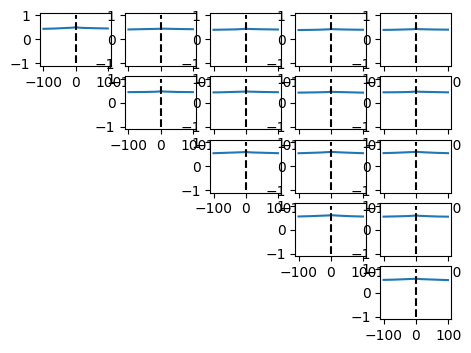

In [172]:
##############################################################################
########### COMPUTE FLATTENED VERSION OF ETHOGRAM + CORRELATION ARRAY ########
##############################################################################

# FIGURE 1: CORRELOGRAMS <- not super informative!
# flatten the ethogram
ethogram_flat = []

for k in range(0,cohort.huddle_ethogram.shape[1],6):
    ethogram_flat.append(cohort.huddle_ethogram[:,k:k+6])
ethogram_flat = np.vstack(ethogram_flat).T
print (ethogram_flat.shape)

# compute the correlograms between each pair of animals
from scipy.stats import pearsonr

#
window = 100
t = np.arange(-window,window,1)
from tqdm import trange 

#
cc_array = []
plt.figure()
for k in range(6):
    for p in trange(k+1,6,1):
        cc = []
        for z in range(-window, window,1):
            cc.append(pearsonr(np.roll(ethogram_flat[k],z), 
                                    ethogram_flat[p])[0])
        cc_array.append([k,p,cc])

        #
        ax=plt.subplot(6,6,k*6+p+1)
        plt.plot(t,cc)
        plt.plot([0,0],[-1,1],'--',c='black')
#

plt.show()

In [115]:
# cc = []
# k = 0
# p = 1
# window = 1000
# t=np.arange(-window,window,1)
# t1 = ethogram_flat[k][520000:630000].copy()
# idx = np.where(t1>0)
# t1[idx] = 1
# diffs = t1[1:]-t1[:-1]
# idx1 = np.where(diffs>0)
# idx2 = np.where(diffs<0)
# t1[:] = 0
# t1[idx1] = 1
# t1[idx2] = -1

# #
# t2 = ethogram_flat[p][520000:630000].copy()
# idx = np.where(t2>0)
# t2[idx] = 1
# diffs = t2[1:]-t2[:-1]
# idx1 = np.where(diffs>0)
# idx2 = np.where(diffs<0)
# t2[:] = 0
# t2[idx1] = 1
# t2[idx2] = -1

# #
# for z in trange(-window, window,1):
#     cc.append(pearsonr(np.roll(t1,z), 
#                         t2)[0])

# #
# #plt.plot([0,0],[0,1],'--',c='black')
# plt.xlabel("seconds")
# #plt.plot([0,0],[50,50],'--',c='black')
# plt.plot(t,cc)
# plt.show()

100%|██████████| 2000/2000 [00:10<00:00, 182.76it/s]


In [106]:
####################################################
########### COMPUTE PAIR WISE SCATTER PLOTS ########
####################################################

# # flatten the ethogram
# ethogram_flat = []

# for k in range(0,cohort.huddle_ethogram.shape[1],6):
#     ethogram_flat.append(cohort.huddle_ethogram[:,k:k+6])
# ethogram_flat = np.vstack(ethogram_flat).T
# print (ethogram_flat.shape)

# plt.figure(figsize=(6,6))
# clrs = ['red','blue','green','black','purple','orange']
# markers = ["," , "o" , "v" , "^" , "<", ">"]

# #
# for k in trange(6):
#     for p in range(k+1,6,1):
#         t1 = ethogram_flat[k].copy()
#         idx = np.where(t1>0)
#         t1[idx] = 1
#         t2 = ethogram_flat[p].copy()
#         idx = np.where(t2>0)
#         t2[idx] = 1

#         # find order of events
#         diff = t1-t2
#         diff2 = diff[1:] - diff[:-1]

#         #
#         idx1 = np.where(diff2==2)[0]
#         idx2 = np.where(diff2==-2)[0]
#         plt.scatter(idx1.shape[0],
#                     idx2.shape[0],
#                     marker=markers[k],
#                     s=100,
#                     c=clrs[p],
#                     label=str(k)+'->'+str(p))

# #
# plt.plot([0,70],[0,70],'--',c='black')
# plt.legend()
# plt.title("# of behavior sequences (1sec resolution))")
# plt.xlim(left=0)
# plt.ylim(bottom=0)
# plt.xlabel("Animal 1 precedes animal 2")
# plt.ylabel("Animal 2 precedes animal 1")
# plt.show()



100%|██████████| 6/6 [00:00<00:00, 12.49it/s]


In [180]:
####################################################
########### SELECT DAY OF ETHOGRAM TO ANALYZ #######
####################################################

print ("# animals, # seconds: ", ethogram_flat.shape)

# here P15 is day 0 for clarity
day_start = 0
day_end = 1

#
times = np.arange(day_start*24*60*60,
                  day_end*24*60*60)
print ("times: ", times)

#
ethogram_flat_selected = ethogram_flat[:,times].copy()
print (ethogram_flat_selected.shape)




# animals, # seconds:  (6, 1382400)
times:  [    0     1     2 ... 86397 86398 86399]
(6, 86400)


In [179]:
####################################################
########### COMPUTE PAIR WISE SCATTER PLOTS ########
####################################################

%matplotlib qt

plt.figure(figsize=(6,6))
clrs = ['red','blue','green','black','purple','orange']
clrs = ['#cb3311', '#4477aa', '#ccbb44', '#228833', '#ee7733', '#66ccee']
markers = ["," , "o" , "v" , "^" , "<", ">"]

#
follow_window = 10
xlim=0
ratios=[]
for k in trange(6):
# for k in [0]:
    # for p in range(k+1,6,1):
    for p in range(6):
    # for p in [1]:
        if k==p:
            continue
        t1 = ethogram_flat_selected[k].copy()
        idx1 = np.where(t1>0)[0]
        t1[idx1] = 1
        t2 = ethogram_flat_selected[p].copy()
        idx2 = np.where(t2>0)[0]
        t2[idx2] = 1

        # find order of events
        a1 = 0     #the number of times animal 1 precedes animal 2
        a2 = 0     # same but opposite order

        #
        ctr = 0
        while ctr<idx1.shape[0]:
        #for i in idx1:

            # check to see if there is a switch from 0
            if t2[idx1[ctr]]==0:
                # to a 1 in the next window
                if np.sum(t2[idx1[ctr]:idx1[ctr]+follow_window])>0:
                    a1+=1

                    # also advance the ctr value at least 10 sec
                    ctr0 = ctr
                    try:
                        while idx1[ctr+1]<(idx1[ctr0]+follow_window) and (ctr<idx1.shape[0]-2):
                            ctr+=1
                            continue
                    except:
                        pass
            ctr+=1

        #
        ctr = 0
        while ctr<idx2.shape[0]:
        #for i in idx1:

            # check to see if there is a switch from 0
            if t1[idx2[ctr]]==0:
                # to a 1 in the next window
                if np.sum(t1[idx2[ctr]:idx2[ctr]+follow_window])>0:
                    a2+=1

                    # also advance the ctr value at least 10 sec
                    ctr0 = ctr
                    try:
                        while idx2[ctr+1]<(idx2[ctr0]+follow_window) and (ctr<idx2.shape[0]-2):
                            ctr+=1
                            continue
                    except:
                        pass
            ctr+=1
        xlim = np.max((xlim,a1,a2))
        plt.scatter(a1,
                    a2,
                    #marker=markers[k],
                    marker=markers[p],
                    s=100,
                    #c=clrs[p],
                    c=clrs[k],

                    label=str(k)+'->'+str(p))


        # print ("animal1 : ", k, ", animal2: ", p, "# of leading behaviours: ", a1)
        # print ("animal1 : ", k, ", animal2: ", p, "# of following behaviours: ", a2)
        ratio = a1/(a1+a2)
        # print ("ratio: ", ratio)
        ratios.append([a1,a2,ratio])
        #print ("a2: ", a2)
#
plt.plot([0,xlim*1.25],[0,xlim*1.25],'--',c='black')
plt.legend(fontsize=8, ncol=6)
plt.title("# of behavior sequences (1sec resulution; 10sec follow window))")
plt.xlim(0,700) 
# plt.xlim(left=0)
plt.ylim(0,700) 
# plt.ylim(bottom=0)
plt.title("start day: "+str(day_start) + ",  day end: "+str(day_end))
plt.xlabel("Animal 1 precedes animal 2")
plt.ylabel("Animal 2 precedes animal 1")
plt.show()
# plt.savefig('/home/cat/Downloads/P26-.png')


100%|█████████████████████████████████████████████| 6/6 [00:09<00:00,  1.57s/it]


In [242]:
#########################################################################################
########### COMPUTE PAIR WISE SCATTER PLOTS - FOR SINGLE ANIMAL OVER DEVELOPMENT ########
#########################################################################################

plt.figure(figsize=(6,6))
clrs = ['red','blue','green','black','purple','orange']
clrs = ['#cb3311', '#4477aa', '#ccbb44', '#228833', '#ee7733', '#66ccee']
markers = ["," , "o" , "v" , "^" , "<", ">"]

#
follow_window = 10
xlim=0
# ratios = np.empty((16,6,6))
# ratios[:] = np.nan

day_starts = np.arange(17)
day_ends = np.arange(1,17,1)

for d in range(16):
    day_start = day_starts[d]
    day_end = day_ends[d]
    #
    times = np.arange(day_start*24*60*60,
                      day_end*24*60*60)
    print ("times: ", times)

    #
    ethogram_flat_selected = ethogram_flat[:,times].copy()

    #for k in trange(6):
    for k in [1]:
        #for p in range(k+1,6,1):
        for p in range(6):
        # for p in [3]:
            if k==p:
                continue
            t1 = ethogram_flat_selected[k].copy()
            idx1 = np.where(t1>0)[0]
            t1[idx1] = 1
            t2 = ethogram_flat_selected[p].copy()
            idx2 = np.where(t2>0)[0]
            t2[idx2] = 1

            # find order of events
            a1 = 0     #the number of times animal 1 precedes animal 2
            a2 = 0     # same but opposite order

            #
            ctr = 0
            while ctr<idx1.shape[0]:
            #for i in idx1:

                # check to see if there is a switch from 0
                if t2[idx1[ctr]]==0:
                    # to a 1 in the next window
                    if np.sum(t2[idx1[ctr]:idx1[ctr]+follow_window])>0:
                        a1+=1

                        # also advance the ctr value at least 10 sec
                        ctr0 = ctr
                        try:
                            while idx1[ctr+1]<(idx1[ctr0]+follow_window) and (ctr<idx1.shape[0]-2):
                                ctr+=1
                                continue
                        except:
                            pass
                ctr+=1

            #
            ctr = 0
            while ctr<idx2.shape[0]:
            #for i in idx1:

                # check to see if there is a switch from 0
                if t1[idx2[ctr]]==0:
                    # to a 1 in the next window
                    if np.sum(t1[idx2[ctr]:idx2[ctr]+follow_window])>0:
                        a2+=1

                        # also advance the ctr value at least 10 sec
                        ctr0 = ctr
                        try:
                            while idx2[ctr+1]<(idx2[ctr0]+follow_window) and (ctr<idx2.shape[0]-2):
                                ctr+=1
                                continue
                        except:
                            pass
                ctr+=1
            xlim = np.max((xlim,a1,a2))
            
            # plt.scatter(a1,
            #             a2,
            #             #marker=markers[k],
            #             marker=markers[p],
            #             # alpha = a,
            #             s=100,
            #             c=clrs[p],
            #             # c=clrs[k],
            #             label=str(k)+'->'+str(p))


            # print ("animal1 : ", k, ", animal2: ", p, "# of leading behaviours: ", a1)
            # print ("animal1 : ", k, ", animal2: ", p, "# of following behaviours: ", a2)
            ratio = a1/(a1+a2)
            # print ("ratio: ", ratio)
            # ratios.append(ratio)
            ratios[d,p,k] = ratio
            #print ("a2: ", a2)
    #
# plt.plot([0,xlim*1.25],[0,xlim*1.25],'--',c='black')
# plt.legend(fontsize=8, ncol=6)
# plt.title("# of behavior sequences (1sec resulution; 10sec follow window))")
# plt.xlim(0,700) 
# # plt.xlim(left=0)
# plt.ylim(0,700) 
# # plt.ylim(bottom=0)
# plt.title("start day: "+str(day_start) + ",  day end: "+str(day_end))
# plt.xlabel("Animal 1 precedes animal 2")
# plt.ylabel("Animal 2 precedes animal 1")
# plt.show()
# plt.savefig('/home/cat/Downloads/P17.png')



times:  [    0     1     2 ... 86397 86398 86399]
times:  [ 86400  86401  86402 ... 172797 172798 172799]
times:  [172800 172801 172802 ... 259197 259198 259199]
times:  [259200 259201 259202 ... 345597 345598 345599]
times:  [345600 345601 345602 ... 431997 431998 431999]
times:  [432000 432001 432002 ... 518397 518398 518399]
times:  [518400 518401 518402 ... 604797 604798 604799]
times:  [604800 604801 604802 ... 691197 691198 691199]
times:  [691200 691201 691202 ... 777597 777598 777599]
times:  [777600 777601 777602 ... 863997 863998 863999]
times:  [864000 864001 864002 ... 950397 950398 950399]
times:  [ 950400  950401  950402 ... 1036797 1036798 1036799]
times:  [1036800 1036801 1036802 ... 1123197 1123198 1123199]
times:  [1123200 1123201 1123202 ... 1209597 1209598 1209599]
times:  [1209600 1209601 1209602 ... 1295997 1295998 1295999]
times:  [1296000 1296001 1296002 ... 1382397 1382398 1382399]


In [244]:
np.save('/home/cat/Downloads/leader-follower/ratios.npy', ratios)

ratios[:,1,0]

array([0.48427673, 0.49908592, 0.46300211, 0.58646617, 0.43883495,
       0.51442308, 0.39106145, 0.48926014, 0.50680787, 0.43835616,
       0.45875543, 0.40865385, 0.45537341, 0.4939577 , 0.44193548,
       0.54883721])

In [4]:
ratios = np.load('/home/cat/Downloads/leader-follower/ratios.npy')

In [ ]:
test = np.mean(np.mean(ratios[:,2:,0:2], axis = 2), axis = 1)
test.shape

sdt = np.std(np.std(ratios[:,2:,0:2], axis = 2), axis = 1)
sdt.shape

In [35]:
test = np.mean(ratios[:,2:,1], axis = 1)
test.shape

sdt = np.std(ratios[:,2:,1], axis = 1)
sdt.shape

(16,)

In [36]:
%matplotlib qt

print (ratios.shape)

plt.figure()

plt.plot(test, color ='red', linewidth = 3, label = 'all pups')
    
plt.xlim(0,15)
plt.xticks(ticks = np.arange(0,16), labels = np.arange(15,31))
plt.xlabel("Postnatal day")

plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel("Leader / Follower ratio")

plt.hlines(0.5,0,15, color = 'black', linestyle = 'dashdot')

plt.legend()

plt.title("Male  vs All pups")

plt.fill_between(np.arange(0,16), np.array([t-s for t,s in zip(test,sdt)]), np.array([t+s for t,s in zip(test,sdt)]))

plt.show()


(16, 6, 6)


Gtk-Message: 13:22:14.692: GtkDialog mapped without a transient parent. This is discouraged.

(python:5649): Gtk-WARNING **: 13:22:14.971: Failed to measure available space: The specified location is not supported


In [9]:
%matplotlib qt

print (ratios.shape)

animals = ['female', 'male', 'pup1', 'pup2', 'pup3', 'pup4']

plt.figure()

clrs = ['#cb3311', '#4477aa', '#ccbb44', '#228833', '#ee7733', '#66ccee']

for i, a in enumerate(clrs):
    
    plt.plot(ratios[:,i,1], color = a, linewidth = 3, label = animals[i])
    
    plt.xlim(0,15)
    plt.xticks(ticks = np.arange(0,16), labels = np.arange(15,31))
    plt.xlabel("Postnatal day")
    
    plt.ylim(0,1)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.ylabel("Leader / Follower ratio")
    
    plt.hlines(0.5,0,15, color = 'black', linestyle = 'dashdot')
    
    plt.legend()
    
    plt.title("Male")

plt.show()


(16, 6, 6)


Gtk-Message: 12:23:48.983: GtkDialog mapped without a transient parent. This is discouraged.

(python:5649): Gtk-WARNING **: 12:23:49.215: Failed to measure available space: The specified location is not supported
